In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
%matplotlib inline

# Create DataSet And Make It A DataFrame 

In [2]:
df = [(2, 1), (1, 2), (3,4)]

In [3]:
df = pd.DataFrame(df, columns= ['X', 'Y'])

# Visualize and Split Data

In [4]:
df['X']

0    2
1    1
2    3
Name: X, dtype: int64

In [5]:
df['Y']

0    1
1    2
2    4
Name: Y, dtype: int64

In [6]:
y = df['Y']
x = df['X']

* Y mean

In [7]:
y_mean = y.mean()
y_mean

2.3333333333333335

* X Mean

In [8]:
x_mean = x.mean()
x_mean 

2.0

* Mean Of X square

In [9]:
x_mean_square = x_mean**2
x_mean_square

4.0

In [10]:
x_mean_y_mean =  x_mean * y_mean 
x_mean_y_mean

4.666666666666667

In [11]:
xy_mean = (x*y).mean()

In [12]:
x_square_mean = (x**2).mean()

In [13]:
m = ((x_mean*y_mean) - xy_mean)/(x_mean_square-x_square_mean)

In [14]:
m

0.9999999999999987

In [15]:
#bias (b) using ȳ-mx̄

In [16]:
b  = y_mean - (m*x_mean)
b

0.33333333333333615

In [17]:
y_pred =m*x+b  # Pridicted Y variables

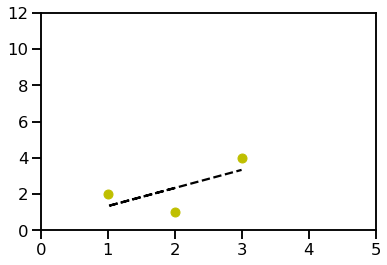

In [18]:

# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x,np.array(y_pred), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

plt.xlim(0, 5)
plt.ylim(0, 12)
plt.show()

# TASK 2

In [20]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [21]:
boston  = datasets.load_boston()
boston.keys()

/home/olamide/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [22]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
            # print(error)
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

In [23]:
from sklearn.datasets import load_boston

data = load_boston()
X = data.data
y = data.target

In [24]:
from sklearn.model_selection import train_test_split
X = normalize(X, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

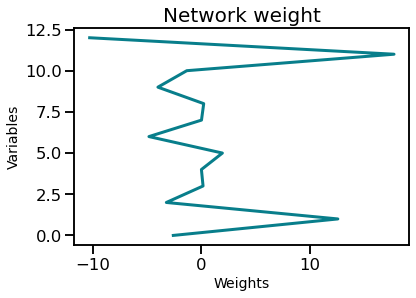

In [31]:
ys = np.arange(len(model.weights))
xs = model.weights

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Network weight', size=20)
plt.xlabel('Weights', size=14)
plt.ylabel('Variables', size=14)
plt.show()

In [32]:
model = LinearRegression(learning_rate=0.5)
model.fit(X_train, y_train)
preds = model.predict(X_test)

model._mean_squared_error(y_test, preds)

29.23356910485999

In [33]:
preds

array([27.3697445 , 30.86596525, 18.47643469, 24.41612805, 19.08150199,
       21.90610206, 20.42397575, 15.64087893, 20.96657976, 21.83882069,
       22.02733257, 22.13656867,  2.69850875, 21.09986263, 24.26750877,
       20.45766612, 21.94829223, 13.01323331, 34.09948244, 18.77324132,
       27.61257821, 28.4380942 , 16.72978517, 25.1413037 , 18.61861108,
       17.9810494 , 22.40982384, 13.99836207, 21.98418693, 21.51370437,
       24.11981869, 26.30018011, 19.78136344, 21.97915173, 16.71013157,
       17.54618544, 30.02259507, 25.84040407, 21.49108667, 22.66609253,
       17.79660862, 31.18603454, 35.72790451, 21.59921672, 26.84798305,
       19.26630725, 19.40796091, 23.44587504, 19.43562357, 29.85567347,
       24.62269393, 31.1686805 , 20.44019195, 25.00174883, 31.77798668,
       20.58516939, 19.7314952 , 32.76929138, 25.82606929, 20.31864324,
       25.7001462 , 32.98088731, 26.78344578, 17.89119464, 26.47432423,
       18.85916452, 19.19117386, 27.13670737, 31.59314895, 14.06

In [34]:
np.where(model.weights==max(model.weights))

(array([5]),)

In [39]:
boston.feature_names[5]


'RM'